In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-stock-price/GOOG.csv


In [2]:
import pandas as pd
df=pd.read_csv('/kaggle/input/google-stock-price/GOOG.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...,...
4853,2023-11-29,138.985001,139.669998,136.294998,136.399994,136.399994,21014700
4854,2023-11-30,136.399994,136.960007,132.789993,133.919998,133.919998,29913500
4855,2023-12-01,133.320007,133.500000,132.151993,133.320007,133.320007,24258400
4856,2023-12-04,131.294006,131.449997,129.399994,130.630005,130.630005,24117100


In [3]:
df.shape

(4858, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4858 non-null   object 
 1   Open       4858 non-null   float64
 2   High       4858 non-null   float64
 3   Low        4858 non-null   float64
 4   Close      4858 non-null   float64
 5   Adj Close  4858 non-null   float64
 6   Volume     4858 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 265.8+ KB


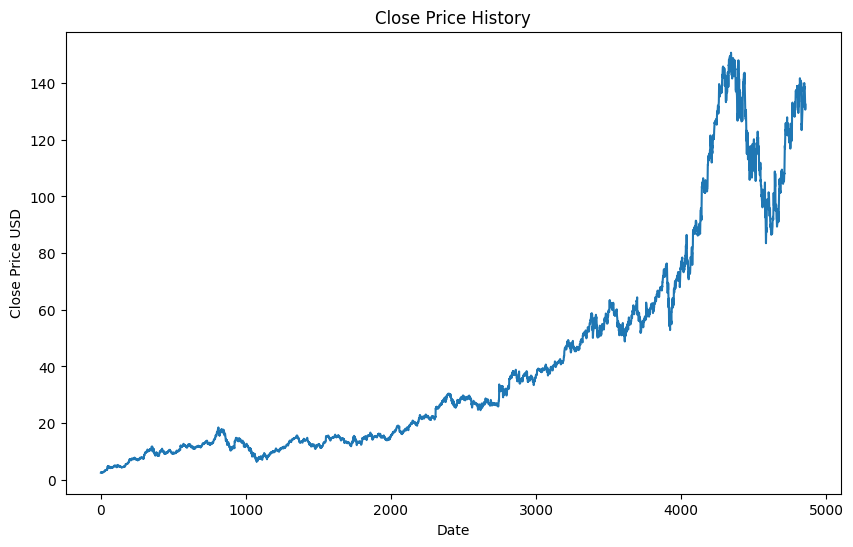

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df['Close'])
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.show()

In [6]:

# Converting 'Date' column to datetime and then to integer format
df['Date'] = pd.to_datetime(df['Date']).astype('int64')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1092873600000000000,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,1092960000000000000,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,1093219200000000000,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,1093305600000000000,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,1093392000000000000,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...,...
4853,1701216000000000000,138.985001,139.669998,136.294998,136.399994,136.399994,21014700
4854,1701302400000000000,136.399994,136.960007,132.789993,133.919998,133.919998,29913500
4855,1701388800000000000,133.320007,133.500000,132.151993,133.320007,133.320007,24258400
4856,1701648000000000000,131.294006,131.449997,129.399994,130.630005,130.630005,24117100


In [7]:
X=df[['Date','Open','High','Low','Volume']]
Y=df[['Close','Adj Close']]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [10]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout
model = Sequential()
model.add(Dense(28, activation='relu', input_shape=(5,)))  
model.add(Dense(14, activation='relu'))
model.add(Dense(1, activation='linear'))


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28)                168       
                                                                 
 dense_1 (Dense)             (None, 14)                406       
                                                                 
 dense_2 (Dense)             (None, 1)                 15        
                                                                 
Total params: 589 (2.30 KB)
Trainable params: 589 (2.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(loss='mean_squared_error',optimizer='Adam',metrics=['accuracy'])

In [13]:
history=model.fit(X_train_scaled,Y_train,epochs=500,validation_split=0.2)

Epoch 1/500
98/98 [==============================] - 1s 5ms/step - loss: 3040.2886 - accuracy: 0.0000e+00 - val_loss: 2940.8091 - val_accuracy: 0.0000e+00
Epoch 2/500
98/98 [==============================] - 0s 3ms/step - loss: 2360.7739 - accuracy: 0.0000e+00 - val_loss: 1746.8156 - val_accuracy: 0.0000e+00
Epoch 3/500
98/98 [==============================] - 0s 3ms/step - loss: 981.4798 - accuracy: 0.0000e+00 - val_loss: 476.5649 - val_accuracy: 0.0000e+00
Epoch 4/500
98/98 [==============================] - 0s 3ms/step - loss: 320.8648 - accuracy: 0.0000e+00 - val_loss: 230.1209 - val_accuracy: 0.0000e+00
Epoch 5/500
98/98 [==============================] - 0s 3ms/step - loss: 159.8099 - accuracy: 0.0000e+00 - val_loss: 107.8546 - val_accuracy: 0.0000e+00
Epoch 6/500
98/98 [==============================] - 0s 3ms/step - loss: 68.2433 - accuracy: 0.0000e+00 - val_loss: 44.2076 - val_accuracy: 0.0000e+00
Epoch 7/500
98/98 [==============================] - 0s 3ms/step - loss: 28.9603

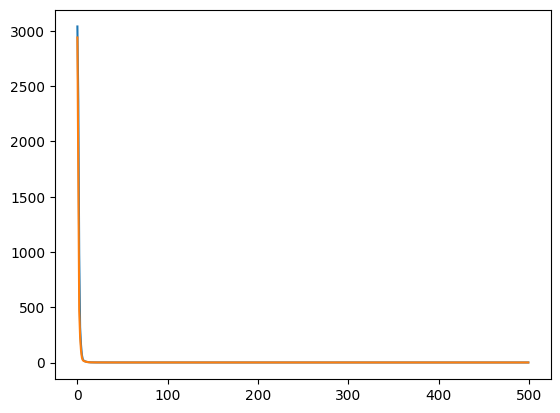

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [15]:
model.evaluate(X_test_scaled,Y_test)

31/31 [==============================] - 0s 2ms/step - loss: 0.2975 - accuracy: 0.0000e+00


[0.2975202202796936, 0.0]

In [16]:
y_pred=model.predict(X_test_scaled)
Y_test_series = Y_test.iloc[:, 0]  
from sklearn.metrics import r2_score
r2 = r2_score(Y_test_series, y_pred) * 100
print(f'R² score: {r2}')


31/31 [==============================] - 0s 1ms/step
R² score: 99.98100852980691
